In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import fsspec

## Monthly Precipitation

In [6]:
# # Local file
# prcp_file = '/Users/pjh/data/nclimgrid-dev/monthly/nclimgrid_prcp.nc'
# with xr.open_dataset(prcp_file) as ncfile:
#     xrd = ncfile

# # HTTP server - one way
# url = 'https://www.ncei.noaa.gov/data/nclimgrid-monthly/access/nclimgrid_prcp.nc#mode=bytes'
# xrd = xr.open_dataset(url)

# HTTP server - another way
url = 'https://www.ncei.noaa.gov/data/nclimgrid-monthly/access/nclimgrid_prcp.nc'
with fsspec.open(url) as fobj:
    xrd = xr.open_dataset(fobj)

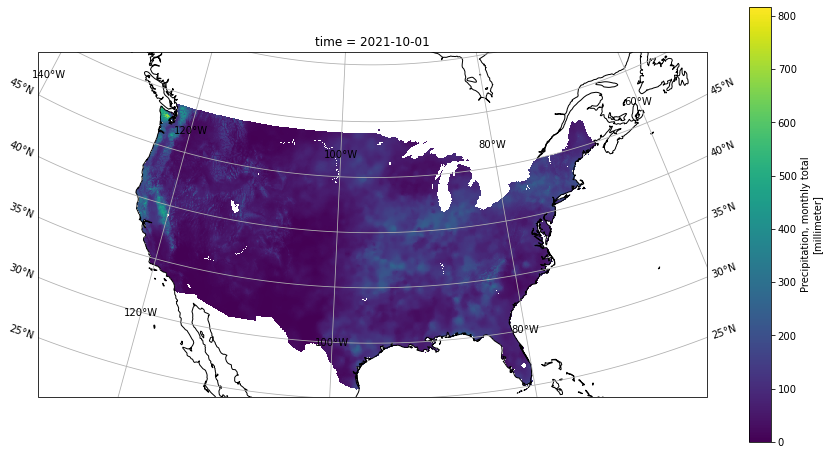

In [7]:
t = np.datetime64('2021-10', 'ns')
buf = 3

central_lon = (xrd.attrs['geospatial_lon_min']+ xrd.attrs['geospatial_lon_max']) / 2
central_lat = (xrd.attrs['geospatial_lat_min'] + xrd.attrs['geospatial_lat_max']) / 2
extent = [xrd.attrs['geospatial_lon_min'] - buf,
          xrd.attrs['geospatial_lon_max'] + buf,
          xrd.attrs['geospatial_lat_min'] - buf,
          xrd.attrs['geospatial_lat_max'] + buf]

plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_lon.item(),
                                               central_latitude=central_lat.item()))
ax.set_extent(extent)
prcp = xrd.prcp.sel(time=t).plot.imshow(ax=ax, transform=ccrs.PlateCarree())
# prcp.set_clim(0, 700)
ax.coastlines()
ax.gridlines(draw_labels=True)
# plt.savefig('img/prcp_monthly_2021-10.jpg')
plt.show()



## Monthly Average Temperature

In [8]:
url = 'https://www.ncei.noaa.gov/data/nclimgrid-monthly/access/nclimgrid_tavg.nc'
with fsspec.open(url) as fobj:
    xrd = xr.open_dataset(fobj)

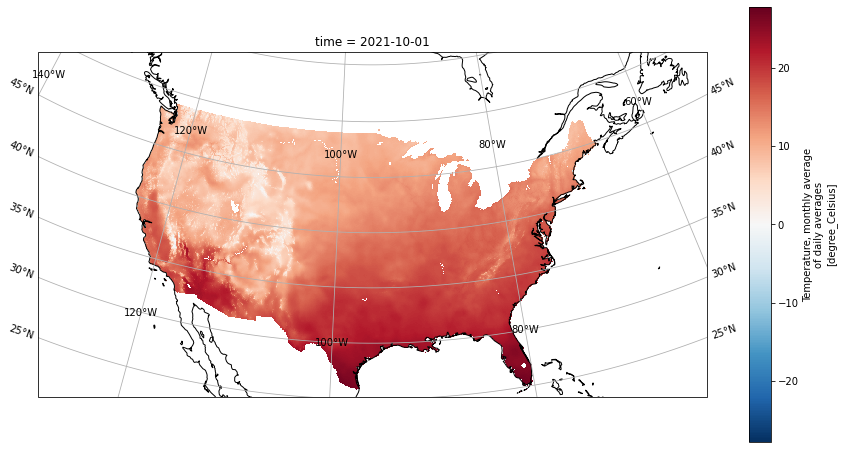

In [9]:
t = np.datetime64('2021-10', 'ns')
buf = 3

central_lon = (xrd.attrs['geospatial_lon_min']+ xrd.attrs['geospatial_lon_max']) / 2
central_lat = (xrd.attrs['geospatial_lat_min'] + xrd.attrs['geospatial_lat_max']) / 2
extent = [xrd.attrs['geospatial_lon_min'] - buf,
          xrd.attrs['geospatial_lon_max'] + buf,
          xrd.attrs['geospatial_lat_min'] - buf,
          xrd.attrs['geospatial_lat_max'] + buf]

plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_lon.item(),
                                               central_latitude=central_lat.item()))
ax.set_extent(extent)
tavg = xrd.tavg.sel(time=t).plot.imshow(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()